In [ ]:
#Importing necessary package and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [ ]:
#pd.read_csv is more efficient(than pd.read_table), as csv has commas that need to be seperated to make the data look cleaner
df_2019 = pd.read_csv('2019.csv')

df_2018 = pd.read_csv('2018.csv')

df_2017 = pd.read_csv('2017.csv')

df_2016 = pd.read_csv('2016.csv')

df_2015 = pd.read_csv('2015.csv')

In [ ]:
#Renaming column names by replacing spaces or any other character with underscore(_)
df_2019.columns = df_2019.columns.str.replace(' ', '_')

df_2018.columns = df_2018.columns.str.replace(' ', '_')

df_2017.columns = df_2017.columns.str.replace('.', '_')

df_2016.columns = df_2016.columns.str.replace(' ', '_')

df_2015.columns = df_2015.columns.str.replace(' ', '_')

<ipython-input-5-37db1f935db6>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_2017.columns = df_2017.columns.str.replace('.', '_')


In [ ]:
#Checking the columns and top 5 rows for year 2019
df_2019.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Renaming columns for better understanding and uniformity
df_2019.rename(columns = {'Country_or_region' : 'Country', 'Score': 'Happiness_score' }, inplace = True)

In [ ]:
#Adding Year column to all the datasets
df_2019['Year'] = 2019

df_2018['Year'] = 2018

df_2017['Year'] = 2017

df_2016['Year'] = 2016

df_2015['Year'] = 2015

In [ ]:
#Getting number of rows & columns
df_2019.shape

(156, 10)

In [ ]:
#Adding continents dictionary. It has continent as the key and correspnding countries as the values.
continent_dict = {
    'Asia': ['Afghanistan', 'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen','Taiwan', 'Singapore', 'Uzbekistan', 'Thailand', 'South Korea', 'Japan', 'Philippines', 'Tajikistan', 'Hong Kong', 'Malaysia', 'Mongolia', 'Kyrgyzstan', 'Turkmenistan', 'Azerbaijan', 'Indonesia', 'China', 'Vietnam', 'Bhutan', 'Nepal', 'Laos', 'Cambodia', 'Palestinian Territories', 'Armenia', 'Georgia', 'Bangladesh', 'Sri Lanka', 'Myanmar', 'India'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)','Congo (Kinshasa)', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau','Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan','Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Trinidad & Tobago', 'Uruguay', 'Venezuela'],
    'Europe': ['Albania', 'Andorra', 'Austria','Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece','Georgia', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands','Northern Cyprus', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
    }

In [ ]:
#Adding continent column to the 2019 dataset using lambda function
df_2019['Continent'] = df_2019['Country'].apply(lambda x: next((k for k in continent_dict if x in continent_dict[k]), None))
df_2019.head()

,Overall_rank,Country,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Europe


In [ ]:
#Rearranging columns to have Year and Continent column prior to the 6 factors.
df_2019 = df_2019[['Country','Overall_rank','Year','Continent','Happiness_score','GDP_per_capita','Social_support','Healthy_life_expectancy', 'Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']]
df_2019.head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,2019,Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,2019,Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,2019,Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,2019,Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Getting data type of all columns
df_2019.dtypes

Country                          object
Overall_rank                      int64
Year                              int64
Continent                        object
Happiness_score                 float64
GDP_per_capita                  float64
Social_support                  float64
Healthy_life_expectancy         float64
Freedom_to_make_life_choices    float64
Generosity                      float64
Perceptions_of_corruption       float64
dtype: object

In [ ]:
#Checking for duplicates & Print the duplicates
duplicates = df_2019[df_2019.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Country, Overall_rank, Year, Continent, Happiness_score, GDP_per_capita, Social_support, Healthy_life_expectancy, Freedom_to_make_life_choices, Generosity, Perceptions_of_corruption]
Index: []


In [ ]:
#Checking for null values or missing data
missing_data_2019 = df_2019.isnull().sum()
missing_data_2019

Country                         0
Overall_rank                    0
Year                            0
Continent                       0
Happiness_score                 0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

In [ ]:
#Checking for zero values
zero_val_2019 = (df_2019 == 0).sum()
zero_val_2019

Country                         0
Overall_rank                    0
Year                            0
Continent                       0
Happiness_score                 0
GDP_per_capita                  1
Social_support                  1
Healthy_life_expectancy         1
Freedom_to_make_life_choices    1
Generosity                      1
Perceptions_of_corruption       1
dtype: int64

In [ ]:
#Since there are zero values in all 6 factors so getting previous years value to substitute zero value from previous years.
df_2018

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [ ]:
#Renaming 2018 dataset columns
df_2018.rename(columns = {'Score': 'Happiness_Score','Country_or_region':'Country'}, inplace=True)

In [ ]:
df_2017.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [ ]:
#Renaming 2017 dataset columns
df_2017.rename(columns = {'Happiness_Rank': 'Overall_rank', 'Economy__GDP_per_Capita_': 'GDP_per_capita', 'Family': 'Social_support','Freedom': 'Freedom_to_make_life_choices','Trust__Government_Corruption_': 'Perceptions_of_corruption','Health__Life_Expectancy_':'Healthy_life_expectancy'}, inplace=True)

In [ ]:
df_2017 = df_2017 [['Country','Overall_rank','Year','Happiness_Score','GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']]
df_2017.head()

,Country,Overall_rank,Year,Happiness_Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Norway,1,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,2017,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,2017,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,2017,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,2017,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [ ]:
df_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [ ]:
#Removing unncessary columns from 2016 dataset
df_2016.drop(['Lower_Confidence_Interval','Upper_Confidence_Interval','Dystopia_Residual','Region'], axis = 1, inplace = True)

In [ ]:
#Renaming 2016 dataset columns
df_2016.rename(columns = {'Happiness_Rank': 'Overall_rank', 'Economy_(GDP_per_Capita)': 'GDP_per_capita', 'Family': 'Social_support','Freedom': 'Freedom_to_make_life_choices','Trust_(Government_Corruption)': 'Perceptions_of_corruption','Health_(Life_Expectancy)':'Healthy_life_expectancy'}, inplace=True)

In [ ]:
df_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
#Removing unncessary columns from 2015 dataset
df_2015.drop(['Region','Standard_Error','Dystopia_Residual'], axis = 1, inplace = True)

In [ ]:
#Renaming 2015 dataset columns
df_2015.rename(columns = {'Happiness_Rank': 'Overall_rank', 'Economy_(GDP_per_Capita)': 'GDP_per_capita', 'Family': 'Social_support','Freedom': 'Freedom_to_make_life_choices','Trust_(Government_Corruption)': 'Perceptions_of_corruption','Health_(Life_Expectancy)':'Healthy_life_expectancy'}, inplace=True)

In [ ]:
#Getting count, mean, minimum & maximum values for each continent using describe function
df_2019.groupby('Continent')['Happiness_score'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,45.0,4.368289,0.643687,2.853,3.97500,4.4610,4.72200,5.888
Asia,43.0,5.224442,0.886827,3.203,4.62750,5.2080,5.89050,7.139
Europe,43.0,6.245000,0.861794,4.332,5.62550,6.1180,7.00300,7.769
North America,12.0,6.151583,0.971130,3.597,5.88250,6.2870,6.66925,7.278
Oceania,2.0,7.267500,0.055861,7.228,7.24775,7.2675,7.28725,7.307
South America,11.0,5.944909,0.477370,4.707,5.76100,6.0860,6.24250,6.444


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: Africa
df_2019_africa = df_2019[df_2019['Continent']=='Africa']

In [ ]:
df_2019_africa.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
56,Mauritius,57,2019,Africa,5.888,1.120,1.402,0.798,0.498,0.215,0.060
71,Libya,72,2019,Africa,5.525,1.044,1.303,0.673,0.416,0.133,0.152
84,Nigeria,85,2019,Africa,5.265,0.696,1.111,0.245,0.426,0.215,0.041
87,Algeria,88,2019,Africa,5.211,1.002,1.160,0.785,0.086,0.073,0.114
88,Morocco,89,2019,Africa,5.208,0.801,0.782,0.782,0.418,0.036,0.076


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: Asia
df_2019_asia = df_2019[df_2019['Continent']=='Asia']

In [ ]:
df_2019_asia.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
12,Israel,13,2019,Asia,7.139,1.276,1.455,1.029,0.371,0.261,0.082
20,United Arab Emirates,21,2019,Asia,6.825,1.503,1.310,0.825,0.598,0.262,0.182
24,Taiwan,25,2019,Asia,6.446,1.368,1.430,0.914,0.351,0.242,0.097
27,Saudi Arabia,28,2019,Asia,6.375,1.403,1.357,0.795,0.439,0.080,0.132
28,Qatar,29,2019,Asia,6.374,1.684,1.313,0.871,0.555,0.220,0.167


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: Europe
df_2019_europe = df_2019[df_2019['Continent']=='Europe']

In [ ]:
df_2019_europe.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,2019,Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,2019,Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,2019,Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,2019,Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: North America
df_2019_north_america = df_2019[df_2019['Continent']=='North America']

In [ ]:
df_2019_north_america.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
8,Canada,9,2019,North America,7.278,1.365,1.505,1.039,0.584,0.285,0.308
11,Costa Rica,12,2019,North America,7.167,1.034,1.441,0.963,0.558,0.144,0.093
18,United States,19,2019,North America,6.892,1.433,1.457,0.874,0.454,0.280,0.128
22,Mexico,23,2019,North America,6.595,1.070,1.323,0.861,0.433,0.074,0.073
26,Guatemala,27,2019,North America,6.436,0.800,1.269,0.746,0.535,0.175,0.078


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: Oceania
df_2019_oceania = df_2019[df_2019['Continent']=='Oceania']

In [ ]:
df_2019_oceania.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
7,New Zealand,8,2019,Oceania,7.307,1.303,1.557,1.026,0.585,0.330,0.38
10,Australia,11,2019,Oceania,7.228,1.372,1.548,1.036,0.557,0.332,0.29


In [ ]:
#Reviewing top 5 countries of each continent based on Happiness score: South America
df_2019_south_america = df_2019[df_2019['Continent']=='South America']

In [ ]:
df_2019_south_america.sort_values(by='Happiness_score', ascending=False).head()

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
25,Chile,26,2019,South America,6.444,1.159,1.369,0.920,0.357,0.187,0.056
31,Brazil,32,2019,South America,6.300,1.004,1.439,0.802,0.390,0.099,0.086
32,Uruguay,33,2019,South America,6.293,1.124,1.465,0.891,0.523,0.127,0.150
38,Trinidad & Tobago,39,2019,South America,6.192,1.231,1.477,0.713,0.489,0.185,0.016
42,Colombia,43,2019,South America,6.125,0.985,1.410,0.841,0.470,0.099,0.034


In [ ]:
#Handling zero value in GDP per capita
df_2019[df_2019.GDP_per_capita == 0]

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
111,Somalia,112,2019,Africa,4.668,0.0,0.698,0.268,0.559,0.243,0.27


In [ ]:
#Per https://www.macrotrends.net/countries/SOM/somalia/gdp-per-capita
#From 2017 to 2019, there was a 7.49 GDP increase
#Increased value = 0.022643 + 0.022643 * 0.0749
#Increased value = 0.022643 + 0.0016948507
#Increased value ≈ 0.0243378507

#Somalia 2019 GDP = 0.0243378507
df_2019.loc[df_2019['Country'] == 'Somalia', 'GDP_per_capita'] = 0.0243378507

In [ ]:
#Handling zero value in Social Support
df_2019[df_2019.Social_support == 0]
#No other data to use for Social_support

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
154,Central African Republic,155,2019,Africa,3.083,0.026,0.0,0.105,0.225,0.235,0.035


In [ ]:
#Handling zero value in Healthy life expectancy
df_2019[df_2019.Healthy_life_expectancy == 0]

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
134,Swaziland,135,2019,Africa,4.212,0.811,1.149,0.0,0.313,0.074,0.135


In [ ]:
#df_2019[df_2019.Healthy_life_expectancy == 0]
#can use 2015 healthy_life_expectancy of 0.07566 * 1.27%
#0.08836 = 2019 healthy_life_expectancy
#df_2015[df_2015['Country'] == 'Swaziland']
df_2019.loc[df_2019['Country'] == 'Swaziland', 'Healthy_life_expectancy'] = 0.08836

In [ ]:
#Handling zero value in Freedom to make life choices
df_2019[df_2019.Freedom_to_make_life_choices == 0]

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
153,Afghanistan,154,2019,Asia,3.203,0.35,0.517,0.361,0.0,0.158,0.025


In [ ]:
#can use 2018 Freedom_to_make_life_choices of .085 as a base
#increase calculated to be 237.5%
#0.286875 = 2019 Freedom_to_make_life_choices
#df_2018[df_2018['Country'] == 'Afghanistan']
df_2019.loc[df_2019['Country'] == 'Afghanistan', 'Freedom_to_make_life_choices'] = 0.286875

In [ ]:
#Handling zero value in Generosity
df_2019[df_2019.Generosity == 0]
#No other data to use for Generosity

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
81,Greece,82,2019,Europe,5.287,1.181,1.156,0.999,0.067,0.0,0.034


In [ ]:
#Handling zero value in Perceptions of corruption
df_2019[df_2019.Perceptions_of_corruption == 0]

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
70,Moldova,71,2019,Europe,5.529,0.685,1.328,0.739,0.245,0.181,0.0


In [ ]:
#df_2019[df_2019.Perceptions_of_corruption == 0]
#From 2017(0.010091) there was a 3.03% increase in score from 2017
#0.0103967
df_2019.loc[df_2019['Country'] == 'Moldova', 'Perceptions_of_corruption'] = 0.0103967

In [ ]:
#first sorting by continent then sorting by values in GDP_per_capita

df_2019.sort_values(['Happiness_score'], ascending = False)

#Of all continents, Africa has a lower overall Happiness_score. Now we look into what factors impact this

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596000,0.153,0.393
1,Denmark,2,2019,Europe,7.600,1.383,1.573,0.996,0.592000,0.252,0.410
2,Norway,3,2019,Europe,7.554,1.488,1.582,1.028,0.603000,0.271,0.341
3,Iceland,4,2019,Europe,7.494,1.380,1.624,1.026,0.591000,0.354,0.118
4,Netherlands,5,2019,Europe,7.488,1.396,1.522,0.999,0.557000,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,2019,Africa,3.334,0.359,0.711,0.614,0.555000,0.217,0.411
152,Tanzania,153,2019,Africa,3.231,0.476,0.885,0.499,0.417000,0.276,0.147
153,Afghanistan,154,2019,Asia,3.203,0.350,0.517,0.361,0.286875,0.158,0.025
154,Central African Republic,155,2019,Africa,3.083,0.026,0.000,0.105,0.225000,0.235,0.035


In [ ]:
df_2019.sort_values(['GDP_per_capita','Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
111,Somalia,112,2019,Africa,4.668,0.024338,0.698,0.268,0.559,0.243,0.270
154,Central African Republic,155,2019,Africa,3.083,0.026000,0.000,0.105,0.225,0.235,0.035
144,Burundi,145,2019,Africa,3.775,0.046000,0.447,0.380,0.220,0.176,0.180
140,Liberia,141,2019,Africa,3.975,0.073000,0.922,0.443,0.370,0.233,0.033
126,Congo (Kinshasa),127,2019,Africa,4.418,0.094000,1.125,0.357,0.269,0.212,0.053
...,...,...,...,...,...,...,...,...,...,...,...
50,Kuwait,51,2019,Asia,6.021,1.500000,1.319,0.808,0.493,0.142,0.097
20,United Arab Emirates,21,2019,Asia,6.825,1.503000,1.310,0.825,0.598,0.262,0.182
33,Singapore,34,2019,Asia,6.262,1.572000,1.463,1.141,0.556,0.271,0.453
13,Luxembourg,14,2019,Europe,7.090,1.609000,1.479,1.012,0.526,0.194,0.316


In [ ]:
df_2019.sort_values(['Social_support', 'Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
154,Central African Republic,155,2019,Africa,3.083,0.026,0.000,0.105,0.225000,0.235,0.035
148,Syria,149,2019,Asia,3.462,0.619,0.378,0.440,0.013000,0.331,0.141
101,Benin,102,2019,Africa,4.883,0.393,0.437,0.397,0.349000,0.175,0.082
144,Burundi,145,2019,Africa,3.775,0.046,0.447,0.380,0.220000,0.176,0.180
153,Afghanistan,154,2019,Asia,3.203,0.350,0.517,0.361,0.286875,0.158,0.025
...,...,...,...,...,...,...,...,...,...,...,...
7,New Zealand,8,2019,Oceania,7.307,1.303,1.557,1.026,0.585000,0.330,0.380
1,Denmark,2,2019,Europe,7.600,1.383,1.573,0.996,0.592000,0.252,0.410
2,Norway,3,2019,Europe,7.554,1.488,1.582,1.028,0.603000,0.271,0.341
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596000,0.153,0.393


In [ ]:
df_2019.sort_values(['Healthy_life_expectancy','Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
134,Swaziland,135,2019,Africa,4.212,0.811,1.149,0.08836,0.313,0.074,0.135
154,Central African Republic,155,2019,Africa,3.083,0.026,0.000,0.10500,0.225,0.235,0.035
143,Lesotho,144,2019,Africa,3.802,0.489,1.169,0.16800,0.359,0.107,0.093
131,Chad,132,2019,Africa,4.350,0.350,0.766,0.19200,0.174,0.198,0.078
98,Ivory Coast,99,2019,Africa,4.944,0.569,0.808,0.23200,0.352,0.154,0.090
...,...,...,...,...,...,...,...,...,...,...,...
5,Switzerland,6,2019,Europe,7.480,1.452,1.526,1.05200,0.572,0.263,0.343
29,Spain,30,2019,Europe,6.354,1.286,1.484,1.06200,0.362,0.153,0.079
57,Japan,58,2019,Asia,5.886,1.327,1.419,1.08800,0.445,0.069,0.140
75,Hong Kong,76,2019,Asia,5.430,1.438,1.277,1.12200,0.440,0.258,0.287


In [ ]:
df_2019.sort_values(['Freedom_to_make_life_choices', 'Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
155,South Sudan,156,2019,Africa,2.853,0.306,0.575,0.295,0.010,0.202,0.091
148,Syria,149,2019,Asia,3.462,0.619,0.378,0.440,0.013,0.331,0.141
146,Haiti,147,2019,North America,3.597,0.323,0.688,0.449,0.026,0.419,0.110
121,Mauritania,122,2019,Africa,4.490,0.570,1.167,0.489,0.066,0.106,0.088
81,Greece,82,2019,Europe,5.287,1.181,1.156,0.999,0.067,0.000,0.034
...,...,...,...,...,...,...,...,...,...,...,...
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
20,United Arab Emirates,21,2019,Asia,6.825,1.503,1.310,0.825,0.598,0.262,0.182
2,Norway,3,2019,Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
108,Cambodia,109,2019,Asia,4.700,0.574,1.122,0.637,0.609,0.232,0.062


In [ ]:
df_2019.sort_values(['Generosity', 'Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
81,Greece,82,2019,Europe,5.287,1.181,1.156,0.999,0.067,0.000,0.034
147,Botswana,148,2019,Africa,3.488,1.041,1.145,0.538,0.455,0.025,0.100
89,Azerbaijan,90,2019,Asia,5.208,1.043,1.147,0.769,0.351,0.035,0.182
88,Morocco,89,2019,Africa,5.208,0.801,0.782,0.782,0.418,0.036,0.076
118,Georgia,119,2019,Asia,4.519,0.886,0.666,0.752,0.346,0.043,0.164
...,...,...,...,...,...,...,...,...,...,...,...
120,Kenya,121,2019,Africa,4.509,0.512,0.983,0.581,0.431,0.372,0.053
21,Malta,22,2019,Europe,6.726,1.300,1.520,0.999,0.564,0.375,0.151
146,Haiti,147,2019,North America,3.597,0.323,0.688,0.449,0.026,0.419,0.110
91,Indonesia,92,2019,Asia,5.192,0.931,1.203,0.660,0.491,0.498,0.028


In [ ]:
df_2019.sort_values(['Perceptions_of_corruption', 'Happiness_score'], ascending = True)

,Country,Overall_rank,Year,Continent,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
96,Bulgaria,97,2019,Europe,5.011,1.092,1.513,0.815,0.311,0.081,0.004
47,Romania,48,2019,Europe,6.070,1.162,1.232,0.825,0.462,0.083,0.005
77,Bosnia and Herzegovina,78,2019,Europe,5.386,0.945,1.212,0.845,0.212,0.263,0.006
45,Kosovo,46,2019,Europe,6.100,0.882,1.232,0.758,0.489,0.262,0.006
132,Ukraine,133,2019,Europe,4.332,0.820,1.390,0.739,0.178,0.187,0.010
...,...,...,...,...,...,...,...,...,...,...,...
7,New Zealand,8,2019,Oceania,7.307,1.303,1.557,1.026,0.585,0.330,0.380
0,Finland,1,2019,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,2019,Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
151,Rwanda,152,2019,Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411


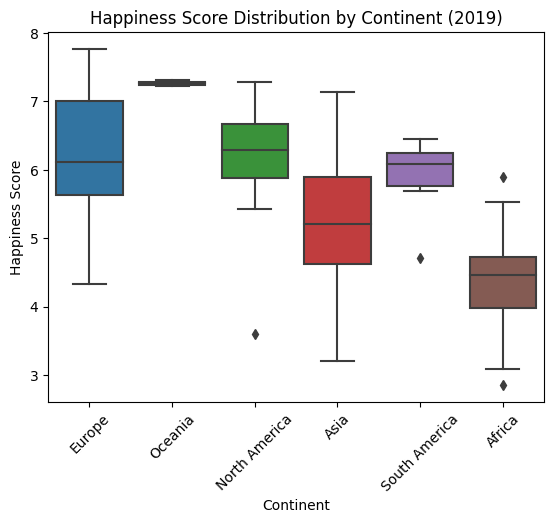

In [ ]:
#Creating box plot between Happiness score and continents
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}

df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

sns.boxplot(data=df_2019, x='Continent', y='Happiness_score')

plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.title('Happiness Score Distribution by Continent (2019)')

plt.show()

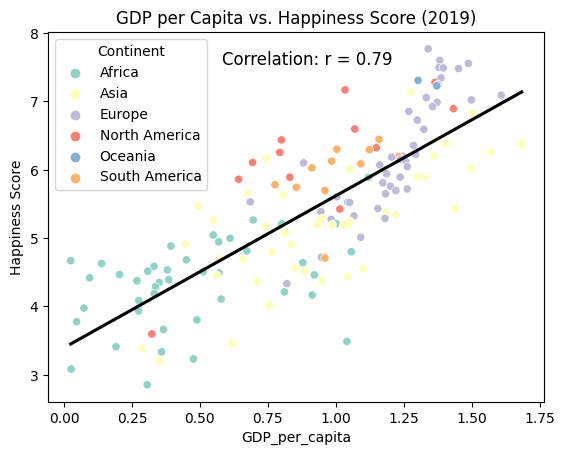

In [ ]:
# GDP per Capita vs. Happiness Score (2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='GDP_per_capita', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='GDP_per_capita', y='Happiness_score', scatter=False, ax=scatter, color='black', ci=None)

# Set the plot labels and title
plt.xlabel('GDP_per_capita')
plt.ylabel('Happiness Score')
plt.title('GDP per Capita vs. Happiness Score (2019)')

# Modify the legend labels
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, continent_names, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['GDP_per_capita'], df_2019['Happiness_score'])
correlation_text = f'Correlation: r = {r:.2f}'

# Display the correlation on the plot
plt.text(0.35, 0.95, correlation_text, transform=plt.gca().transAxes, va='top', fontsize=12)

# Show the plot
plt.show()

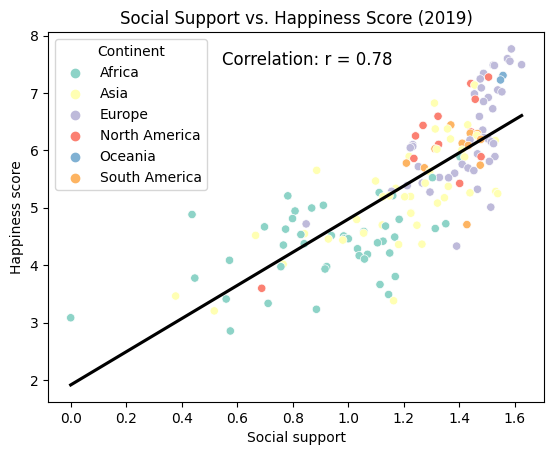

In [ ]:
#Social Support vs Happiness Score(2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='Social_support', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='Social_support', y='Happiness_score', scatter=False, ax=scatter, line_kws={'color':'black'}, ci=None)

# Set the plot labels and title
plt.xlabel('Social support')
plt.ylabel('Happiness score')
plt.title('Social Support vs. Happiness Score (2019)')

# Modify the legend labels
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, continent_names, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['Social_support'], df_2019['Happiness_score'])
correlation_text = f'Correlation: r = {r:.2f}'

# Display the correlation on the plot
plt.text(0.35, 0.95, correlation_text, transform=plt.gca().transAxes, va='top', fontsize=12)

# Remove the shade part of the regression line
scatter.collections[1].remove()

# Show the plot
plt.show()

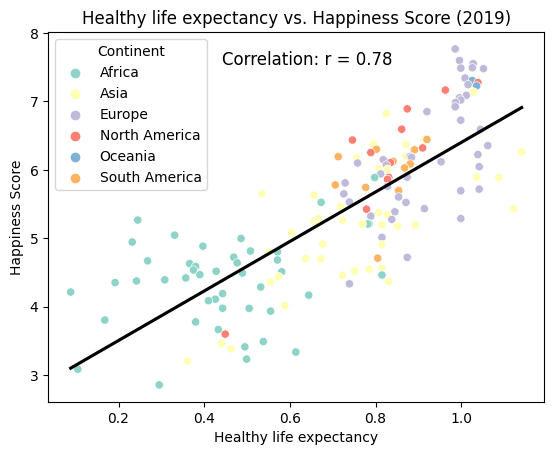

In [ ]:
# Healthy Life Epectancy vs Happiness Score(2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='Healthy_life_expectancy', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='Healthy_life_expectancy', y='Happiness_score', scatter=False, ax=scatter, color='black', ci=None)

# Set the plot labels and title
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness Score')
plt.title('Healthy life expectancy vs. Happiness Score (2019)')

# Modify the legend labels
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, continent_names, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['Healthy_life_expectancy'], df_2019['Happiness_score'])
correlation_text = f'Correlation: r = {r:.2f}'

# Display the correlation on the plot
plt.text(0.35, 0.95, correlation_text, transform=plt.gca().transAxes, va='top', fontsize=12)

# Show the plot
plt.show()

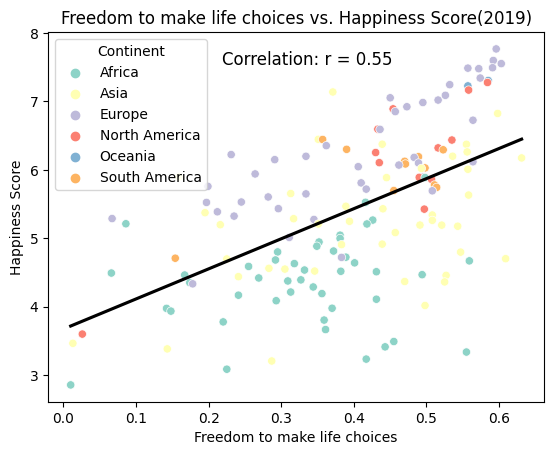

In [ ]:
#Freedom to make life choices vs. Happiness Score(2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='Freedom_to_make_life_choices', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='Freedom_to_make_life_choices', y='Happiness_score', scatter=False, ax=scatter, color='black', ci=None)

# Set the plot labels and title
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Freedom to make life choices vs. Happiness Score(2019)')

# Modify the legend labels
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, continent_names, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['Freedom_to_make_life_choices'], df_2019['Happiness_score'])
correlation_text = f'Correlation: r = {r:.2f}'

# Display the correlation on the plot
plt.text(0.35, 0.95, correlation_text, transform=plt.gca().transAxes, va='top', fontsize=12)

# Show the plot
plt.show()


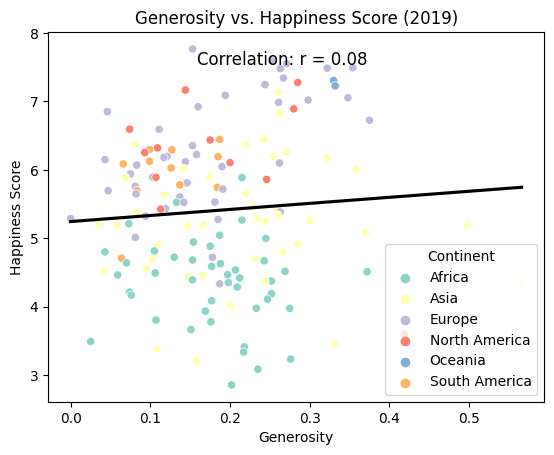

In [ ]:
#Generosity vs. Happiness Score(2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='Generosity', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='Generosity', y='Happiness_score', scatter=False, ax=scatter, line_kws={'color':'black'}, ci=None)

# Set the plot labels and title
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Generosity vs. Happiness Score (2019)')

# Modify the legend labels
handles, _ = scatter.get_legend_handles_labels()
scatter.legend(handles, continent_names, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['Generosity'], df_2019['Happiness_score'])
correlation_text = f'Correlation: r = {r:.2f}'

# Display the correlation on the plot
plt.text(0.30, 0.95, correlation_text, transform=plt.gca().transAxes,va='top', fontsize=12)

# Show the plot
plt.show()


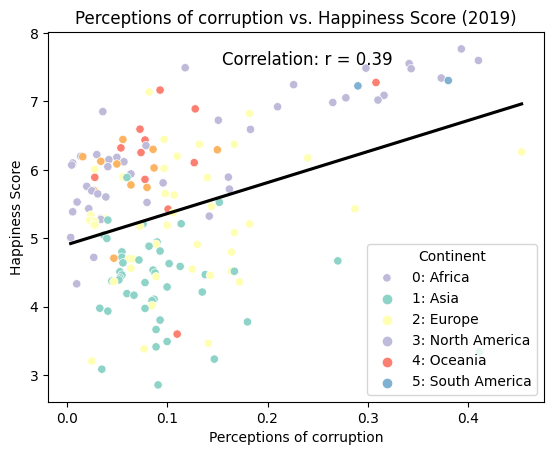

In [ ]:
# Perception of corruption vs. Happiness Score (2019)

# Define the continent dictionary
continent_dict = {'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}
continent_names = list(continent_dict.keys())

# Map the continent labels to numeric values
df_2019['Continent Label'] = df_2019['Continent'].map(continent_dict)

# Create the scatter plot with color-coded continents and customized regression line
scatter = sns.scatterplot(data=df_2019, x='Perceptions_of_corruption', y='Happiness_score', hue='Continent Label', palette='Set3')
sns.regplot(data=df_2019, x='Perceptions_of_corruption', y='Happiness_score', scatter=False, ax=scatter, line_kws={'color':'black'}, ci=None)

# Set the plot labels and title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Perceptions of corruption vs. Happiness Score (2019)')

# Modify the legend labels
legend_labels = [f'{continent_dict[label]}: {label}' for label in continent_names]
scatter.legend(legend_labels, title='Continent')

# Calculate the correlation coefficient (r)
r, _ = pearsonr(df_2019['Perceptions_of_corruption'], df_2019['Happiness_score'])

# Display the correlation on the plot
plt.text(0.35, 0.95, f'Correlation: r = {r:.2f}', transform=plt.gca().transAxes,va='top', fontsize=12 )

plt.show()


In [ ]:
#Conclusion
from tabulate import tabulate
A = 'Happiness score'
table = [[' ','Factors','Correlation Coefficient'],[A,'GDP per capita',0.79],[A,'Social Support',0.78], ['happiness score','Healthy Life Expectancy',0.78],[A,'Freedom to Make Life Choices',0.56],[A,'Perceptions of Corruption',0.39],[A,'Generosity',0.08]]
print(tabulate(table,headers='firstrow'))

                 Factors                         Correlation Coefficient
---------------  ----------------------------  -------------------------
Happiness score  GDP per capita                                     0.79
Happiness score  Social Support                                     0.78
happiness score  Healthy Life Expectancy                            0.78
Happiness score  Freedom to Make Life Choices                       0.56
Happiness score  Perceptions of Corruption                          0.39
Happiness score  Generosity                                         0.08
